In [21]:
import pandas as pd

# Step 1: Load the raw CSV (skip the description row)
raw_ilinet = pd.read_csv("ILINet.csv", 
                         delimiter=r"\s{2,}",  # split on 2+ spaces
                         engine="python", 
                         skiprows=1)

# Step 2: Split the single combined column into multiple columns using commas
ilinet = raw_ilinet.iloc[:, 0].str.split(",", expand=True)

# Step 3: Assign proper column names
ilinet.columns = [
    "region_type", "region", "year", "week", "weighted_ili", "unweighted_ili",
    "age_0_4", "age_25_49", "age_25_64", "age_5_24", "age_50_64", "age_65",
    "ilitotal", "num_providers", "total_patients"
]

# Step 4: Convert numeric columns to float (non-numeric like 'X' will become NaN)
for col in ilinet.columns[4:]:
    ilinet[col] = pd.to_numeric(ilinet[col], errors="coerce")

# Step 5: Create a datetime column from year and week
ilinet["date"] = pd.to_datetime(ilinet["year"].astype(str) + "-" + ilinet["week"].astype(str) + "-1", format="%Y-%W-%w")

# Filter the ILINet dataset to include only data from 2010 onwards
# Ensure the "year" column is numeric before filtering
ilinet["year"] = pd.to_numeric(ilinet["year"], errors="coerce")

# Filter the ILINet dataset to include only data from 2010 onwards
ilinet_filtered = ilinet[ilinet["year"] >= 2010].copy()

ilinet = ilinet_filtered.drop(['region','age_25_64'], axis=1) # Returns a new DataFrame
ilinet.to_csv('cleaned.csv')

# Done! Now you can use ilinet for analysis or modeling
ilinet.head()


,region_type,year,week,weighted_ili,unweighted_ili,age_0_4,age_25_49,age_5_24,age_50_64,age_65,ilitotal,num_providers,total_patients,date
640,National,2010,1,1.90712,1.98284,4998,3333.0,3961,1244.0,763,14299,1996,721138,2010-01-04
641,National,2010,2,1.86738,1.82749,4877,2793.0,4614,1182.0,622,14088,2016,770895,2010-01-11
642,National,2010,3,1.88072,1.92606,5399,2693.0,5079,1008.0,578,14757,2053,766177,2010-01-18
643,National,2010,4,1.96908,1.92495,5333,2560.0,5655,1046.0,528,15122,2026,785580,2010-01-25
644,National,2010,5,2.11387,2.08877,5816,2581.0,6142,948.0,550,16037,1996,767773,2010-02-01


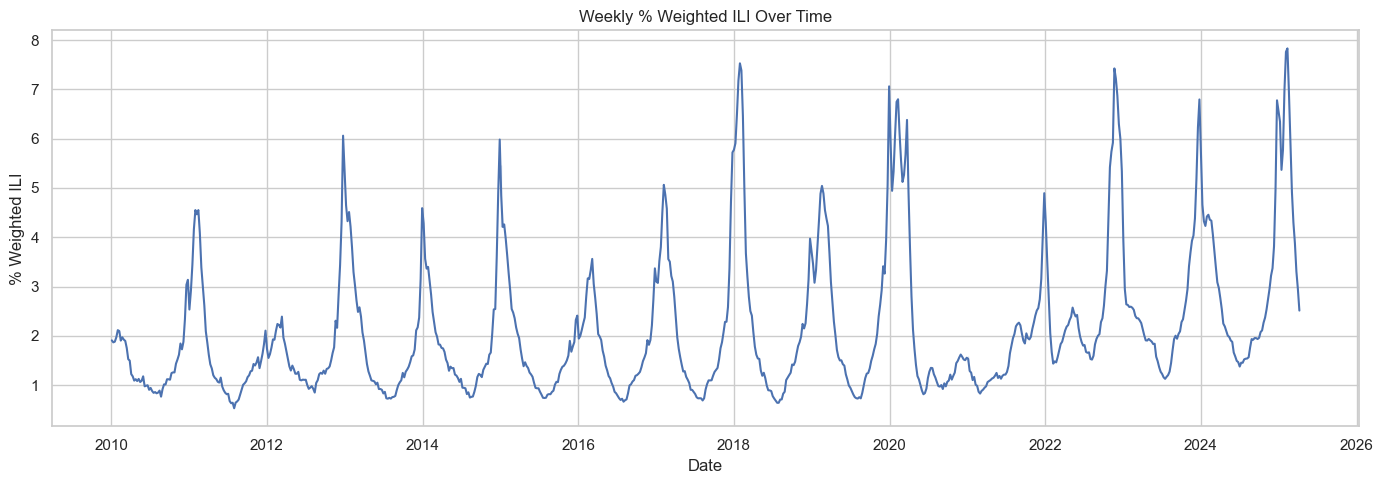

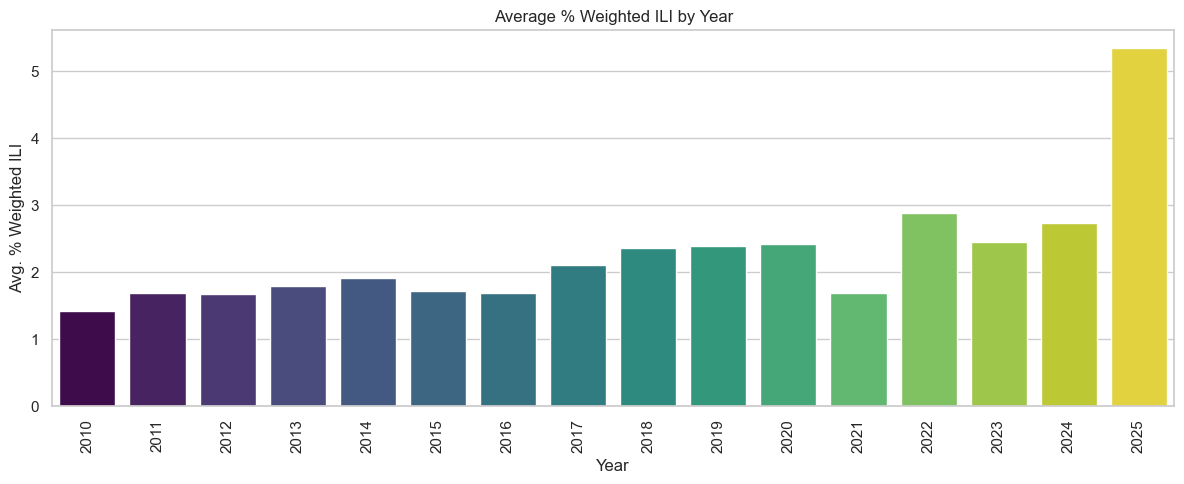

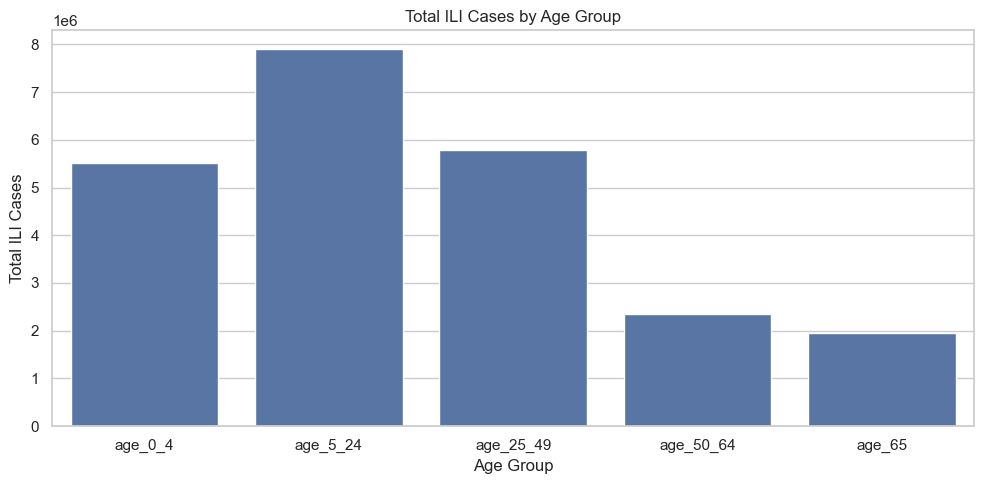

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: % Weighted ILI over time
plt.figure(figsize=(14, 5))
sns.lineplot(data=ilinet, x="date", y="weighted_ili")
plt.title("Weekly % Weighted ILI Over Time")
plt.xlabel("Date")
plt.ylabel("% Weighted ILI")
plt.tight_layout()
plt.show()

# Plot 2: Yearly average % Weighted ILI
plt.figure(figsize=(12, 5))
yearly_avg = ilinet.groupby("year")["weighted_ili"].mean().reset_index()
sns.barplot(data=yearly_avg, x="year", y="weighted_ili", hue="year", palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Average % Weighted ILI by Year")
plt.xlabel("Year")
plt.ylabel("Avg. % Weighted ILI")
plt.tight_layout()
plt.show()

# Plot 3: Total ILI cases by Age Group (summed over dataset)
age_groups = ["age_0_4", "age_5_24", "age_25_49", "age_50_64", "age_65"]
age_sums = ilinet[age_groups].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=age_sums.index, y=age_sums.values)
plt.title("Total ILI Cases by Age Group")
plt.ylabel("Total ILI Cases")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()
